# Part 2: Preprocessing and Modelling

###  Contents:
- [1. Standard Imports](#1.Standard-Imports)
- [2. Data Import for train & test data](#2.Data-Import-for-train-&-test-data)

- [3. Splitting train dataset into train & holdout sets](#3.Splitting-train-dataset-into-train-&-holdout-sets)
- [4. Preprocessing X_train with StandardScaler & pd.get_dummies](#4.Preprocessing-X_train-with-StandardScaler-&-pd.get_dummies)
- [5. Preprocessing X_test with StandardScaler & pd.get_dummies](#5.Preprocessing-X_test-with-StandardScaler-&-pd.get_dummies)
- [6. Baseline Score](#6.Baseline-Score)

- [7.Cross validation & Linear Regression](#7.Cross-validation-&-Linear-Regression)
- [8.LassoCv & Lasso Regression on holdout set](#8.LassoCv-&-Lasso-Regression-on-holdout-set)
- [9.RidgeCv & Ridge Regression on holdout set](#9.RidgeCv-&-Ridge-Regression-on-holdout-set)
- [10.Comparing RMSE of different Regression models on holdout set](#10.Comparing-RMSE-of-different-Regression-models-on-holdout-set)
- [11.Preprocessing on train set](#11.Preprocessing-on-train-set)
- [12.Fit the entire Train set and predict the Test set](#Fit-the-entire-Train-set-and-predict-the-Test-set)
- [13.Create Submission to Kaggle](#13.Create-Submission-to-Kaggle)
- [14.Result Obtained from Kaggle Submission](#14.Result-Obtained-from-Kaggle-Submission)
- [15.Conclusions](#15.Conclusions)
- [16.Recommendations](#16.Recommendations)


### 1.Standard Imports

In [1]:
# imports for pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# model selection imports for train_test_split, cross_val_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold

# imports for preprocessing
from sklearn.preprocessing import StandardScaler

# model selection imports for linear ML algorithm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

# imports for Regression metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 2.Data Import for train & test data

In [2]:
# import the previously cleaned train set
train_cleaned = pd.read_csv('train_cleaned.csv', keep_default_na = False)

In [3]:
# import the previously cleaned test set
# this will be used in the final kaggle submission

test_cleaned = pd.read_csv('test_cleaned.csv', keep_default_na = False)

In [4]:
# checking that data imported is correct for train_cleaned
train_cleaned.head()

,MS Zoning,TotRms AbvGrd,House Style,Roof Matl,Mas Vnr Type,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Gr Liv Area,Total Bsmt SF,Garage Area,1st Flr SF,Year Remod/Add,Year Built,Mas Vnr Area,BsmtFin SF 1,age of house,SalePrice
0,RL,6,2Story,CompShg,BrkFace,4,3,3,3,1,...,1479,725.0,475.0,725,2005,1976,289.0,533.0,45,130500
1,RL,8,2Story,CompShg,BrkFace,4,3,4,3,1,...,2122,913.0,559.0,913,1997,1996,132.0,637.0,25,220000
2,RL,5,1Story,CompShg,None,3,4,3,3,1,...,1057,1057.0,246.0,1057,2007,1953,0.0,731.0,68,109000
3,RL,7,2Story,CompShg,None,3,3,4,3,1,...,1444,384.0,400.0,744,2007,2006,0.0,0.0,15,174000
4,RL,6,1.5Fin,CompShg,None,3,3,2,4,1,...,1445,676.0,484.0,831,1993,1900,0.0,0.0,121,138500


In [5]:
# checking that data imported is correct for test_cleaned
test_cleaned.head()

,MS Zoning,TotRms AbvGrd,House Style,Roof Matl,Mas Vnr Type,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Sale Type,Gr Liv Area,Total Bsmt SF,Garage Area,1st Flr SF,Year Remod/Add,Year Built,Mas Vnr Area,BsmtFin SF 1,age of house
0,RM,9,2Story,CompShg,None,3,2,2,3,1,...,WD,1928,1020,440,908,1950,1910,0.0,0,111
1,RL,10,1Story,CompShg,None,3,3,4,3,1,...,WD,1967,1967,580,1967,1977,1977,0.0,0,44
2,RL,7,2Story,CompShg,None,4,3,4,4,3,...,New,1496,654,426,664,2006,2006,0.0,554,15
3,RM,5,1Story,CompShg,None,4,3,3,3,1,...,WD,968,968,480,968,2006,1923,0.0,0,98
4,RL,6,1Story,CompShg,BrkFace,3,3,4,3,1,...,WD,1394,1394,514,1394,1963,1963,247.0,609,58


### 3.Splitting train dataset into train & holdout sets

In [7]:
# get the target array, y for the train columns
# y is the 'SalePrice' which is what we are predicting

y_targetarray = train_cleaned['SalePrice']

In [8]:
#checking the shape for y
#the number of rows in target array should match our feature matrix

y_targetarray.shape

(2044,)

In [9]:
# variables that are chosen for feature matrix

X_chose_variables = train_cleaned[['Gr Liv Area', 'Garage Area','age of house',
'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF','Overall Qual','Overall Cond', 'Exter Qual', 'Sale Type','TotRms AbvGrd','Roof Matl','House Style' ]]

In [10]:
# check that feature matrix rows matches the number of rows for targetarray

X_chose_variables.shape

(2044, 13)

In [11]:
# split into train and holdout set
# so that we can test on the holdout set & compare the RMSE score of our models

X_train, X_holdout, y_train, y_holdout = train_test_split(X_chose_variables, y_targetarray, random_state=42)

In [12]:
# checking the 

print('X_train.shape :',X_train.shape)
print('X_holdout.shape :',X_holdout.shape)
print('y_train.shape :',y_train.shape)
print('y_holdout.shape :',y_holdout.shape)

X_train.shape : (1533, 13)
X_holdout.shape : (511, 13)
y_train.shape : (1533,)
y_holdout.shape : (511,)


### 4.Preprocessing X_train with StandardScaler & pd.get_dummies

In [13]:
# split the interested columns into numerical_variables & categorical_variables
# StandardScaling for numerical_variables
# pd.get_dummies for categorical_variables

numerical_variables=['Gr Liv Area', 'Garage Area','age of house','Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF','Overall Qual','Overall Cond','Exter Qual', 'TotRms AbvGrd']                    
categorical_variables=['Sale Type','House Style', 'Roof Matl']

In [14]:
from sklearn.preprocessing import StandardScaler

# instantiate StandardScaler()
scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train[numerical_variables])

# fit transform the train set & convert into DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_variables]))

In [15]:
X_train_scaled.shape

(1533, 10)

In [16]:
# pd.get_dummies for each column
# drop first column for each dummy
# drop index for this DataFrame

X_train_dum =pd.get_dummies(X_train[categorical_variables], drop_first=True).reset_index(drop=True)

In [17]:
X_train_dum.shape

(1533, 19)

In [18]:
# concatenate the scaled portion and get_dummy portion back together

X_train_transformed = pd.concat([X_train_scaled ,X_train_dum], axis=1)

In [19]:
#X_train_transformed.drop(columns='index', inplace=True)

In [20]:
X_train_transformed.shape

(1533, 29)

### 5.Preprocessing X_holdout with StandardScaler & pd.get_dummies

In [21]:
# transform the holdout set & convert into DataFrame

X_holdout_scaled = pd.DataFrame(scaler.transform(X_holdout[numerical_variables]))

In [22]:
X_holdout_dum =pd.get_dummies(X_holdout[categorical_variables], drop_first=True).reset_index(drop=True)

In [23]:
X_holdout_transformed = pd.concat([X_holdout_scaled ,X_holdout_dum], axis=1)

In [24]:
# in this case there are different categories inside the same column
print('X_holdout_transformed.shape :', X_holdout_transformed.shape)
print('X_train_transformed.shape :', X_train_transformed.shape)

X_holdout_transformed.shape : (511, 27)
X_train_transformed.shape : (1533, 29)


In [25]:
# adding new dummies, the holdout set shape does not match the train set
# shapes of the X_train and X_holdout set need to match when using ML alorithms

X_holdout_transformed['1st dum']=0
X_holdout_transformed['2nd dum']=0

# checink shape after adding new columns
print('X_holdout_transformed.shape :', X_holdout_transformed.shape)
print('X_train_transformed.shape :', X_train_transformed.shape)

X_holdout_transformed.shape : (511, 29)
X_train_transformed.shape : (1533, 29)


### 6.Baseline Score

In [26]:
# calculate the RMSE score for average y vs actual y

print('Baseline Score:' , np.sqrt(((y_targetarray - y_targetarray.mean())**2).sum()/len(y_targetarray)) )

Baseline Score: 77244.43661228866


In order for regression models to have a better performance, the RMSE score needs to be lower than the baseline score of 77244.43661228866.

### 7.Cross validation & Linear Regression

In [27]:
# instantiate lr
lr = LinearRegression()

In [29]:
# RMSE, Root Mean Squared Error from Cross_val_score of linear regression
np.sqrt(abs(cross_val_score(lr, X_train_transformed, y_train, cv=50, scoring='neg_mean_squared_error').mean()))

27391.711566203234

In [30]:
# fit the train set
lr.fit(X_train_transformed, y_train)

# predict on holdoutset
lr_pred = lr.predict(X_holdout_transformed)

LinearRegression()

In [33]:
print('Linear regression using optimal alpha, RMSE: ', np.sqrt(mean_squared_error(y_holdout, lr_pred)) )

Linear regression using optimal alpha, RMSE:  38715.07972882008


In [34]:
# when Standard scaling the columns names changed
# combining the column names together

transformed_column_list = X_chose_variables.columns[:10].append(X_train_transformed.columns[10:])

In [35]:
pd.DataFrame({'Features':transformed_column_list, 'Coefficient':lr.coef_}).sort_values(by='Coefficient', ascending=False).head()

,Features,Coefficient
28,Roof Matl_WdShngl,91822.109691
25,Roof Matl_Membran,66336.085127
11,Sale Type_Con,60019.896458
15,Sale Type_New,40069.076502
16,Sale Type_Oth,32997.978318


- As the Roof Matl_WdShngl feature increased by one unit, then the 'SalePrice' increase by $91822.11 which is the Coefficient.
- Above is the top 5 features with coefficient that have most postive correlation to 'SalePrice' using Linear Regression.

In [36]:
pd.DataFrame({'Features':transformed_column_list, 'Coefficient':lr.coef_}).sort_values(by='Coefficient', ascending=True).head()

,Features,Coefficient
20,House Style_2.5Fin,-26104.628144
2,age of house,-7696.522081
27,Roof Matl_WdShake,-5629.941870
22,House Style_2Story,-1079.743285
9,Sale Type,-412.974825


- As the House Style_2.5Fin feature increased by one unit, then the 'SalePrice' decrease by $26104.63 which is the Coefficient.
- Above is the top 5 features with coefficient that have most negative correlation to 'SalePrice' using Linear Regression.

### 8.LassoCv & Lasso Regression on holdout set
- use LassoCV find the optimal alpha
- Cross_val_score on Lasso()
- use Lasso() on holdout set

In [37]:
# try using n_alpha argument to find the optimal alpha

lasso_cv = LassoCV(n_alphas=500, cv=5) #put cv =100
lasso_cv.fit(X_train_transformed, y_train)

LassoCV(cv=5, n_alphas=500)

In [38]:
# take the best alpha from that laso regularization fit
lasso_cv.alpha_

62.305822060040654

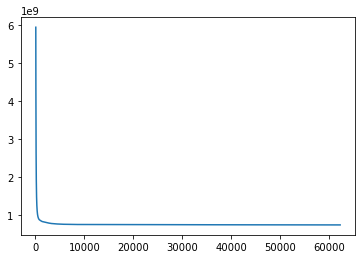

In [39]:
lasso_cv_means =[np.mean(cv_alpha) for cv_alpha in lasso_cv.mse_path_]

fig = plt.figure(figsize=(6,4))
ax = plt.gca()

ax.plot(lasso_cv.alphas_, list(reversed(lasso_cv_means)))

In [41]:
# calculate the RMSE of lasso through cross_val_score

np.sqrt(abs(cross_val_score(Lasso(alpha=lasso_cv.alpha_), X_train_transformed, y_train, cv=50, scoring='neg_mean_squared_error').mean()))

27380.819521607897

In [42]:
# use the optimal alpha into the actual Lasso model
lasso = Lasso(alpha=lasso_cv.alpha_)

# fit with the train set
lasso.fit(X_train_transformed, y_train)

# predictions from lasso from holdout set
lasso_pred = lasso.predict(X_holdout_transformed)

In [48]:
# intercept for lasso regression
lasso.intercept_

175182.073615624

In [43]:
# coefficient for lasso regression
# coefficient for each variable in the train & holdout columns
lasso.coef_

array([31507.84247635,  6602.67696569, -7866.20776327,  5542.90783488,
       12727.25256673,  7062.68657253, 16207.92200505,  6358.61938625,
       11522.8902095 ,  -431.56682439,     0.        ,    82.38685545,
        2175.92359486,     0.        ,     0.        , 27604.03797577,
           0.        ,   939.94156775,  7904.09709353,  6736.31070008,
          -0.        ,     0.        , -1971.95755569,     0.        ,
        5160.58523319,     0.        ,     0.        ,    -0.        ,
       51153.19332452])

In [49]:
print('Lasso regression using optimal alpha, RMSE: ', np.sqrt(mean_squared_error(y_holdout, lasso_pred)) )

Lasso regression using optimal alpha, RMSE:  27978.661976523636


In [50]:
pd.DataFrame({'Features':transformed_column_list, 'Coefficient':lasso.coef_}).sort_values(by='Coefficient', ascending=False).head()

,Features,Coefficient
28,Roof Matl_WdShngl,51153.193325
0,Gr Liv Area,31507.842476
15,Sale Type_New,27604.037976
6,Overall Qual,16207.922005
4,BsmtFin SF 1,12727.252567


- As the Roof Matl_WdShngl feature increase by one unit, then the 'SalePrice' increase by $51153.20 which is the Coefficient.
- Above is the top 5 features with coefficient that have most postive correlation to 'SalePrice' using Lasso Regression.

In [51]:
pd.DataFrame({'Features':transformed_column_list, 'Coefficient':lasso.coef_}).sort_values(by='Coefficient', ascending=True).head()

,Features,Coefficient
2,age of house,-7866.207763
22,House Style_2Story,-1971.957556
9,Sale Type,-431.566824
14,Sale Type_ConLw,0.000000
23,House Style_SFoyer,0.000000


- As the 'age of house' feature increase by one unit, then the 'SalePrice' decrease by $7866.21 which is the Coefficient.
- the Coefficient for 'Sale Type_ConLw' is 0, because Lasso Regression will shrink the unimportant features to 0
- Above is the top 5 features with coefficient that have most negative correlation to 'SalePrice' using Lasso Regression.

### 9.RidgeCv & Ridge Regression on holdout set

- use RidgeCV find the optimal alpha
- Cross_val_score on Ridge()
- use Ridge() on holdout set

In [52]:
#parse a list of alphas
# use RidgeCV to find alpha value

r_alphas = np.logspace(0, 5, 200) #parse a list of alphas

ridge_cv = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_cv.fit(X_train_transformed, y_train)
ridge_cv.alpha_

1.0

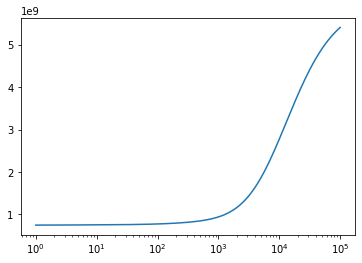

In [54]:
ridge_cv_means = [np.mean(cv_alpha) for cv_alpha in ridge_cv.cv_values_.T]

# do a semilogx
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

ax.semilogx(ridge_cv.alphas, ridge_cv_means)

# x-axis is the alphas
# so  lower the alpha will overfit
# then higher the alpha will underfit

In [55]:
np.sqrt(abs(cross_val_score(Ridge(alpha=ridge_cv.alpha_), X_train_transformed, y_train, cv=50, scoring='neg_mean_squared_error').mean()))

27350.77735387094

In [56]:
# use the optimal alpha into the actual Ridge model
ridge = Ridge(alpha=ridge_cv.alpha_)

# fit train set
ridge.fit(X_train_transformed, y_train)

# predict on the holdout set
ridge_pred = ridge.predict(X_holdout_transformed)

In [57]:
print('Ridge regression using optimal alpha, RMSE: ', np.sqrt(mean_squared_error(y_holdout, ridge_pred)) )

Ridge regression using optimal alpha, RMSE:  33404.77010596892


In [58]:
pd.DataFrame({'Features':transformed_column_list, 'Coefficient':ridge.coef_}).sort_values(by='Coefficient', ascending=False).head()

,Features,Coefficient
28,Roof Matl_WdShngl,65857.955534
11,Sale Type_Con,37626.953435
15,Sale Type_New,36313.710199
25,Roof Matl_Membran,32916.055747
0,Gr Liv Area,32163.854024


- As the Roof Matl_WdShngl feature increase by one unit, then the 'SalePrice' increase by $65857.96 which is the Coefficient.
- Above is the top 5 features with coefficient that have most postive correlation to 'SalePrice' using Ridge Regression

In [59]:
pd.DataFrame({'Features':transformed_column_list, 'Coefficient':ridge.coef_}).sort_values(by='Coefficient', ascending=True).head()

,Features,Coefficient
20,House Style_2.5Fin,-15642.961589
2,age of house,-7707.819076
27,Roof Matl_WdShake,-4822.949306
22,House Style_2Story,-1163.638697
9,Sale Type,-543.269102


- As the House Style_2.5Fin feature increase by one unit, then the 'SalePrice' decrease by $15642.96 which is the Coefficient.
- Above is the top 5 features with coefficient that have most negative correlation to 'SalePrice' using Lasso Regression

### 10.Comparing RMSE of different Regression models on holdout set



|Regression Algoritms  | RMSE Score on holdout set  | Remarks  | 
|---|---|---|
|Lasso Regression   | 27979  | Lowest RMSE score hence selected  | 
|Ridge Regression   | 33404  |   |   
|Linear Regression   |38715  |   |  

- Based on the above table, Lasso Regression produced the lowest RMSE score.
- Hence Lasso Regression performs better on the holdout set than Ridge or Linear Regression
- Lasso Regression with the optimal alpha will be chosen to use on the test set and Kaggle Submission

### 11.Preprocessing on train set

In [66]:
# same numerical and categorical variables chosen for the train set

numerical_variables=['Gr Liv Area', 'Garage Area','age of house','Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF','Overall Qual','Overall Cond','Exter Qual', 'TotRms AbvGrd']
categorical_variables=['Sale Type','House Style', 'Roof Matl']

In [68]:
# target array
y_train = train_cleaned['SalePrice']

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform the entire train dataset on their numerical variables
train_scaled = scaler.fit_transform(train_cleaned[numerical_variables])
train_scaled = pd.DataFrame(train_scaled)

# get_dummies the entire train dataset on their categorical variables
train_dum =pd.get_dummies(train_cleaned[categorical_variables], drop_first=True).reset_index(drop=True)

# concatenate back into the train set
train_transformed = pd.concat([train_scaled ,train_dum], axis=1)

In [69]:
# test set, so we transform only for StandardScaling
test_scaled = scaler.transform(test_cleaned[numerical_variables])

# get_dummies the entire test dataset on their categorical variables
test_scaled = pd.DataFrame(test_scaled)
test_dum =pd.get_dummies(test_cleaned[categorical_variables], drop_first=True).reset_index(drop=True)

# concatenate back into the train set
test_transformed = pd.concat([test_scaled ,test_dum], axis=1)

In [70]:
print('train_transformed.shape :',train_transformed.shape)
print('test_transformed.shape :',test_transformed.shape)

train_transformed.shape : (2044, 29)
test_transformed.shape : (879, 31)


In [71]:
# add columns to train set

train_transformed['extra_dum']=0
train_transformed['extra_dum 2']=0

print('train_transformed.shape :',train_transformed.shape)
print('test_transformed.shape :',test_transformed.shape)

train_transformed.shape : (2044, 31)
test_transformed.shape : (879, 31)


### 12.Fit the entire Train set and predict the Test set

In [72]:
# instantiate the Lasso model with the optimal alpha found from lassoCV
lasso = Lasso(alpha=lasso_cv.alpha_)

# fit the entire train_transformed and y_train dataset into the lasso model
lasso.fit(train_transformed, y_train)

# predict the score based on y_test
lasso_pred = lasso.predict(test_transformed)

### 13.Create Submission to Kaggle

In [73]:
test =pd.read_csv('./datasets/test.csv')

In [74]:
my_submission = pd.DataFrame({'Id':test['Id'], 'SalePrice': lasso_pred})


my_submission.to_csv('mysubmission.csv', index=False)
pd.read_csv("mysubmission.csv").head()

,Id,SalePrice
0,2658,175905.080579
1,2718,179504.671353
2,2414,222017.156549
3,1989,116636.605911
4,625,173536.012252


### 14.Result Obtained from Kaggle Submission

- RMSE score on Kaggle is 30591 usd using Lasso Regression with optimal alpha used earlier
- RMSE score on test dataset from Kaggle is higher than holdout set.
- This is because test dataset is unseen data, there are many factors that my Lasso Regression perform better on the holdout set. One reason could be that the data cleaning was done before train_test_split or too many outliers were removed.


### 15.Conclusions
- the above chosen variables can estimate the prediction of 'SalePrice' with a RMSE of 30591 usd
- Exploratory Data Analysis helps to eliminate obvious variables that do not help in predicting 'SalePrice' by visual inference
- There is a balance between how many Outliers should be removed or stay in the dataset, they will affect prediction of 'SalePrice' and the unseen data might have outlier datapoints too.
- Even though Ordinal columns are categorical, they can be mapped with values to show order and be used in Standard Scaling to reflect relationship to each other
- Lasso & Ridge Regression introduce regularization and helps avoid overfitting like the Linear Regression.
- Lasso Regression produced a better RMSE score that Ridge Regression as Lasso will shrink the unimportant features to 0, this minimises RMSE.
- Current model may generalise to new data, this is because the first 10 times submission to Kaggle(I did not scale the categorical & numerical variables correctly) the following few submissions were based on doing the correct preprocessing.

### 16.Recommendations
- Interested buyers may use this model to predict the estimate 'SalePrice' for houses in Ames.
- Sellers may use this model to predict how much they can offer their houses for sale.
- In addition, Real estate agents can estimate which features contribute to 'SalePrice' and may provide advice to to buyers/sellers why that house is priced at that estimated value.
